In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from main import *

In [3]:
import sys, matplotlib, tqdm
print(sys.version)
print(matplotlib.__version__)
print(tqdm.__version__)

3.9.10 | packaged by conda-forge | (main, Feb  1 2022, 21:24:11) 
[GCC 9.4.0]
3.5.1
4.67.1


In [4]:
import json

with open('gen10000/metadata.json', 'r') as file:
    meta = json.load(file)

In [5]:
import pandas as pd
meta_data = {'key' : list(meta.keys())}
for k in ['n_generations', 'n_verified', 'n_nondegenerate', 'runtime']:
    meta_data[k] = [v[k] for _,v in meta.items()]
for k in ['rng_difficulties', 'pso_difficulties',]:
    meta_data[k] = [len(v[k]) for _,v in meta.items()]

df = pd.DataFrame(data=meta_data)
df

key  n_generations  n_verified  n_nondegenerate      runtime  \
0    007bbfb7          12398       12398            12398     6.904372   
1    017c7c7b          10362       10341            10341    22.083956   
2    045e512c          10005       10005            10000    32.369339   
3    05269061          10353       10353            10047    44.997027   
4    06df4c85          10235       10235            10000    88.332134   
..        ...            ...         ...              ...          ...   
395  f8c80d96          10051       10000            10000    48.100908   
396  f9012d9b          10009       10000            10000  1123.923014   
397  fcb5c309          10000       10000            10000    47.351702   
398  feca6190          23735       23735            23735    10.768775   
399  ff805c23          10000       10000            10000   263.672635   

     rng_difficulties  pso_difficulties  
0               10000             10000  
1               10000             10000  
2               10000             10000  
3               10000             10000  
4               10000             10000  
..                ...               ...  
395             10000             10000  
396             10000             10000  
397             10000             10000  
398             10000             10000  
399             10000             10000  

[400 rows x 7 columns]

007bbfb7
original:


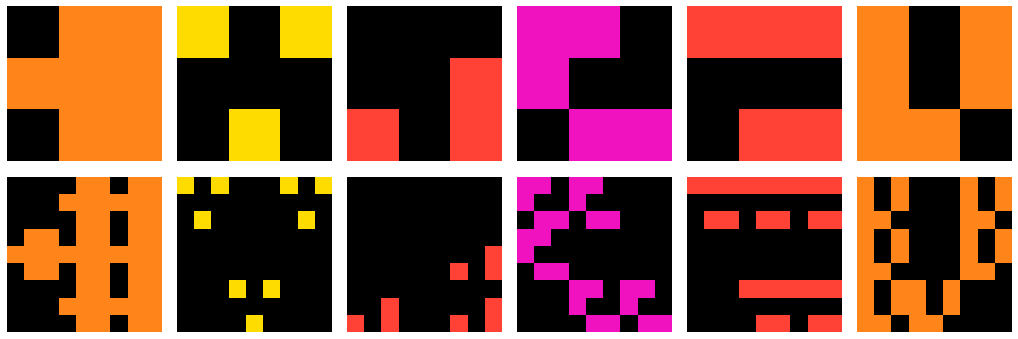

generated (easy):


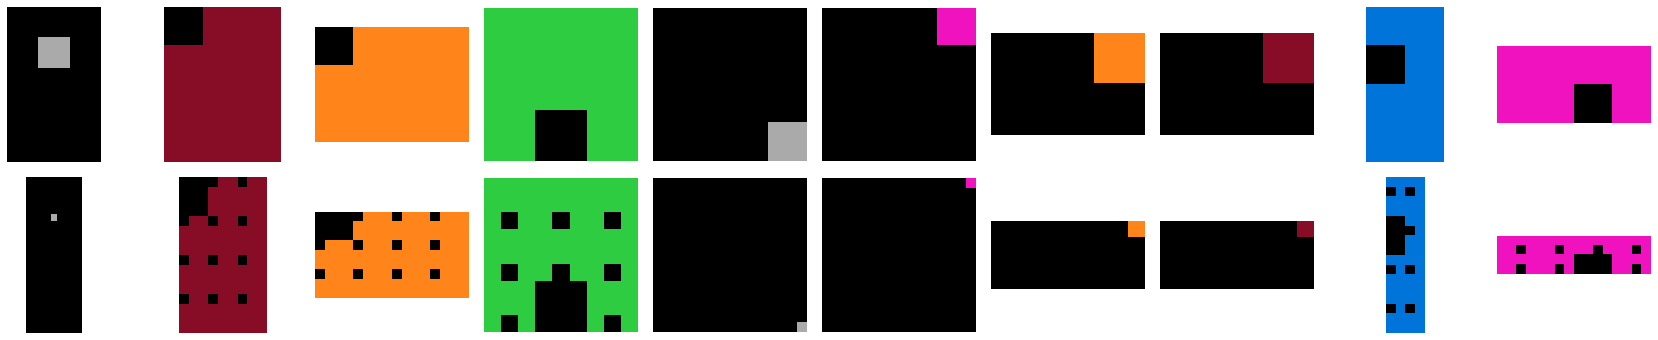

generated (hard):


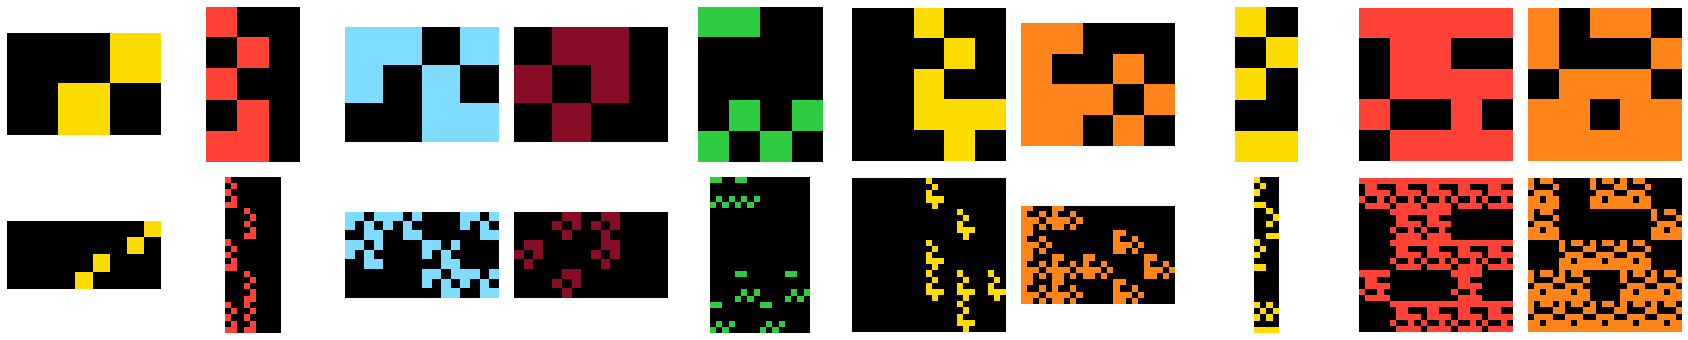

00d62c1b
original:


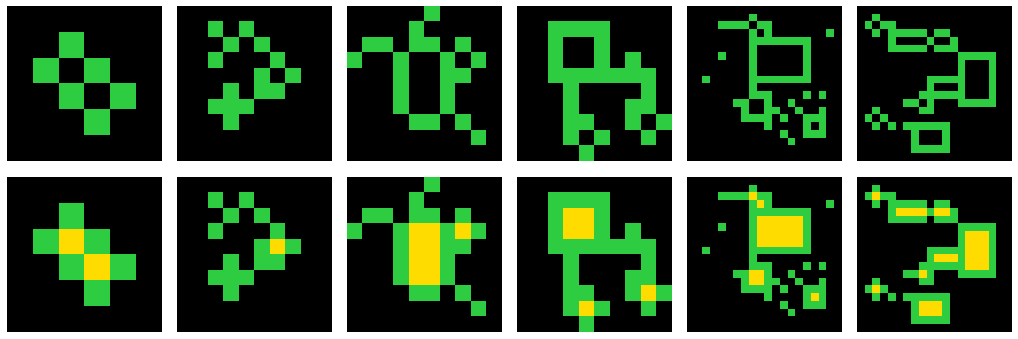

generated (easy):


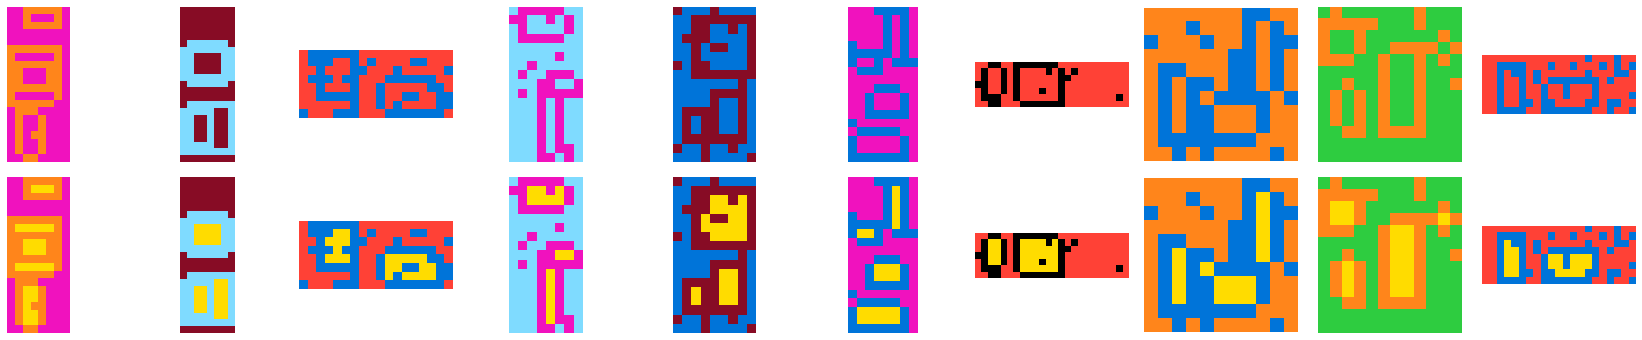

generated (hard):


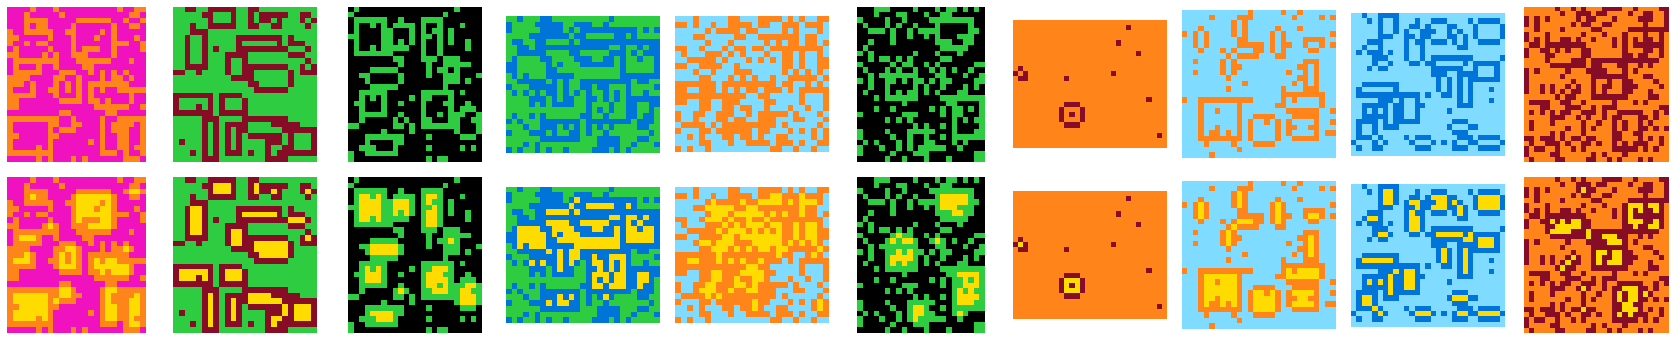

017c7c7b
original:


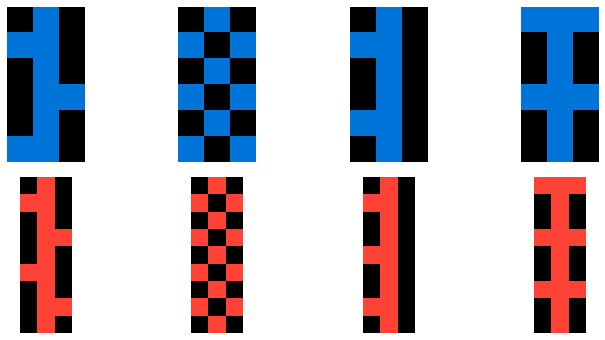

generated (easy):


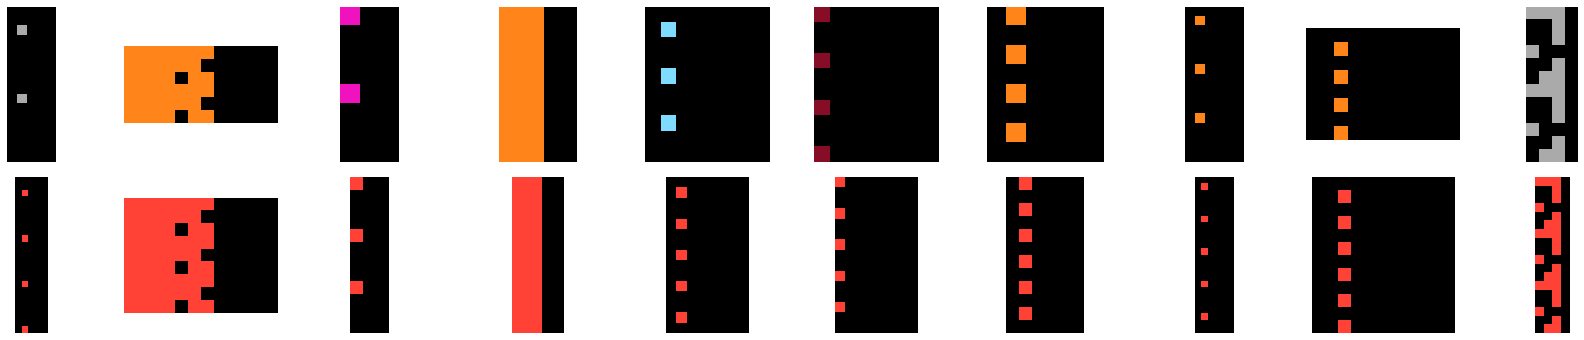

generated (hard):


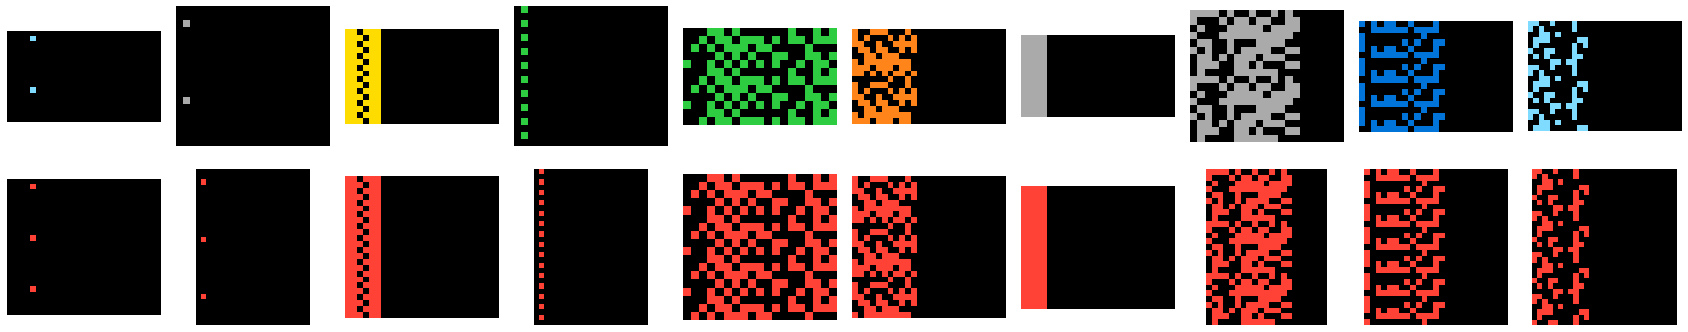

025d127b
original:


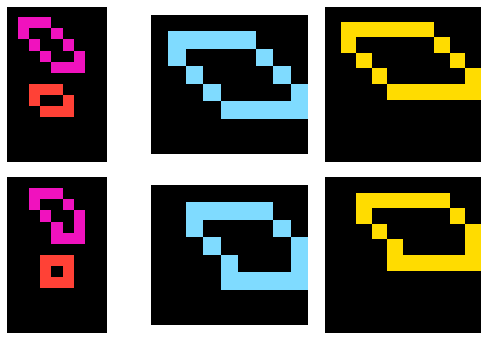

generated (easy):


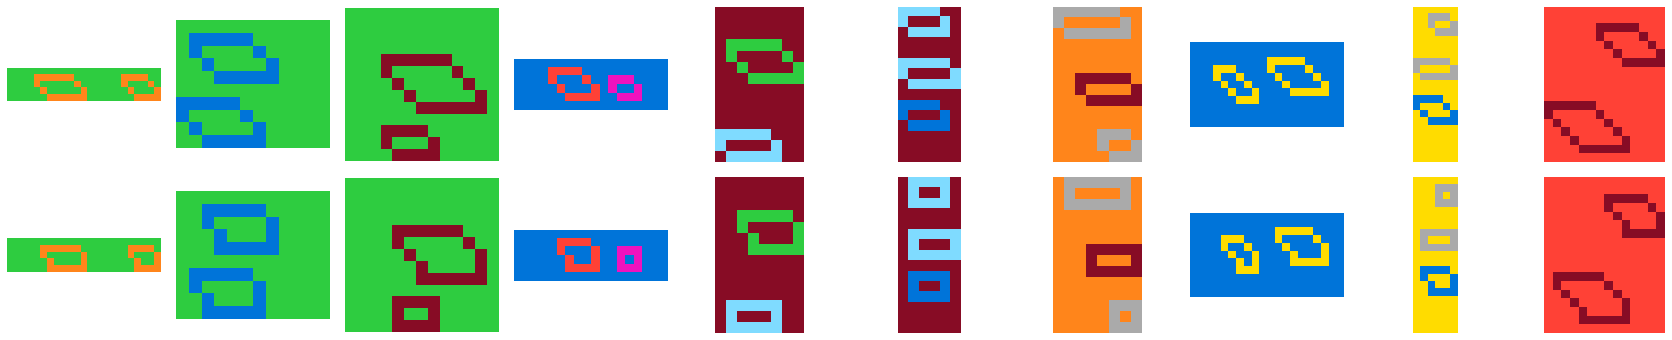

generated (hard):


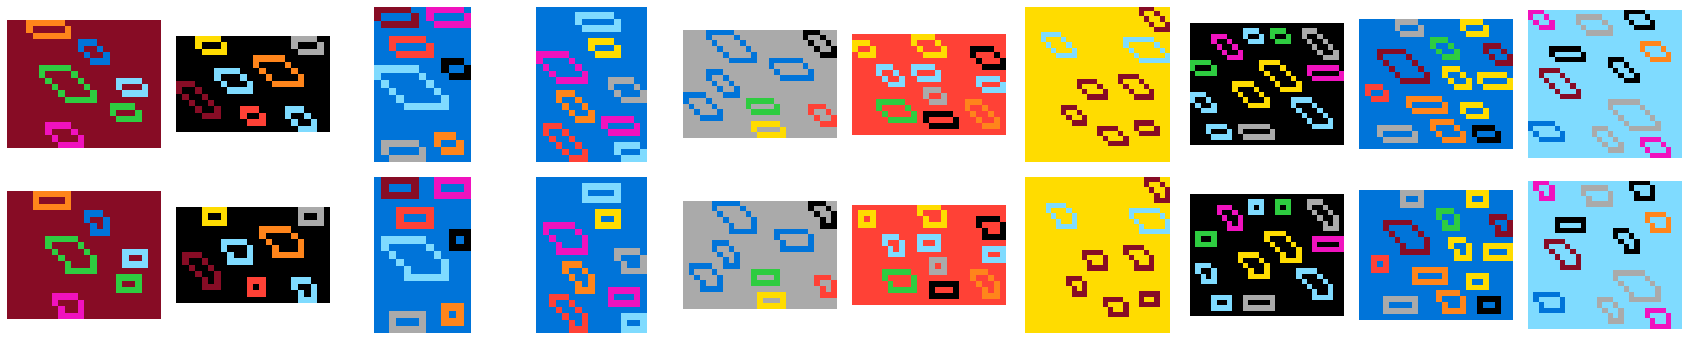

045e512c
original:


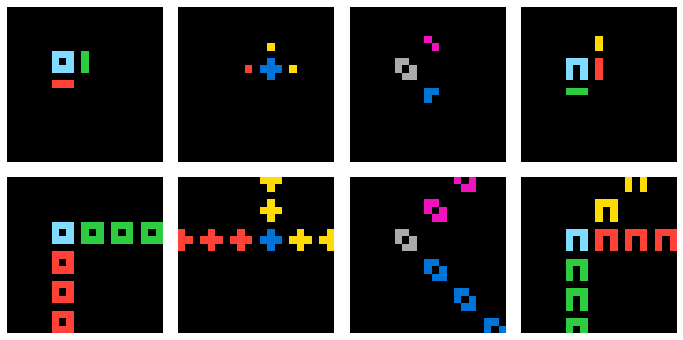

generated (easy):


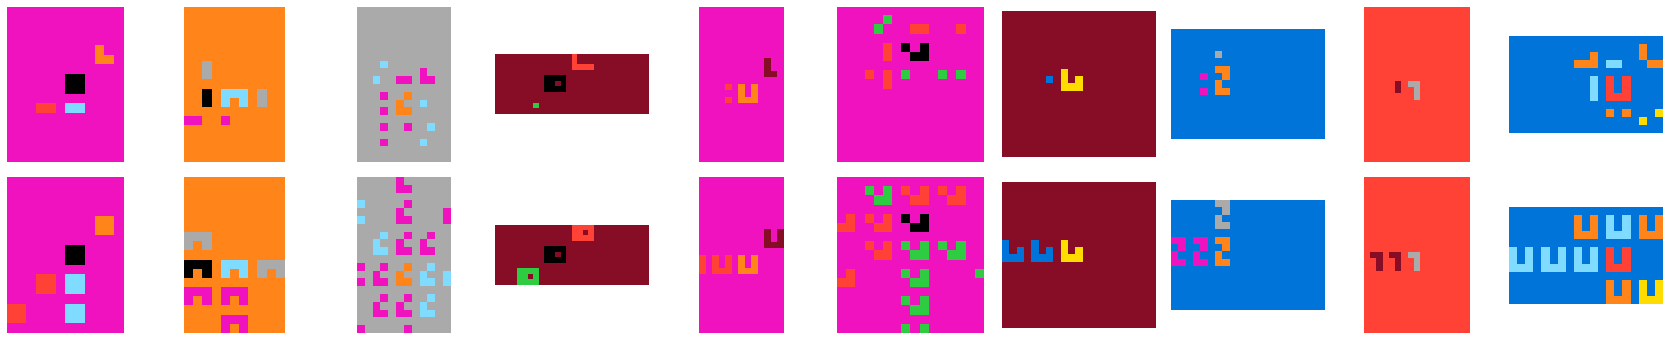

generated (hard):


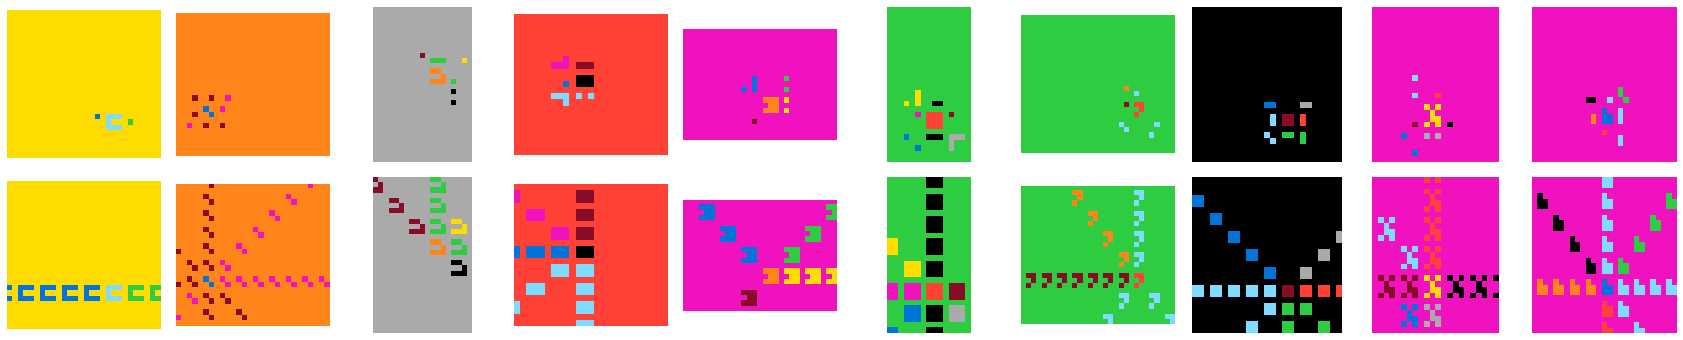

0520fde7
original:


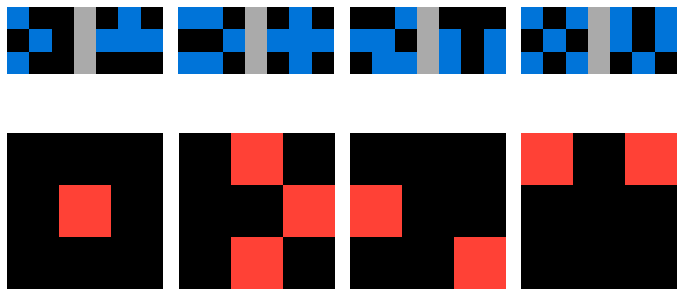

generated (easy):


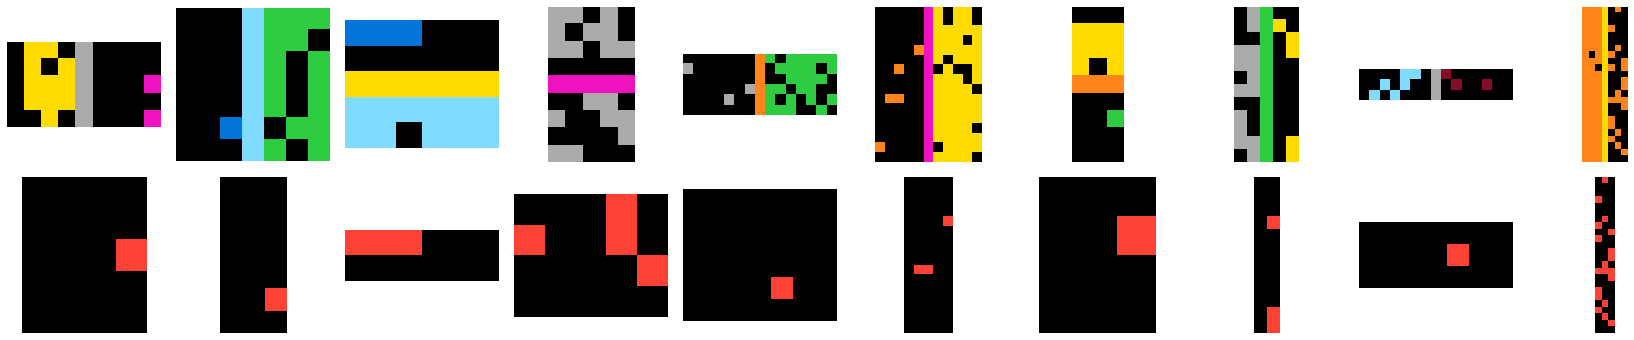

generated (hard):


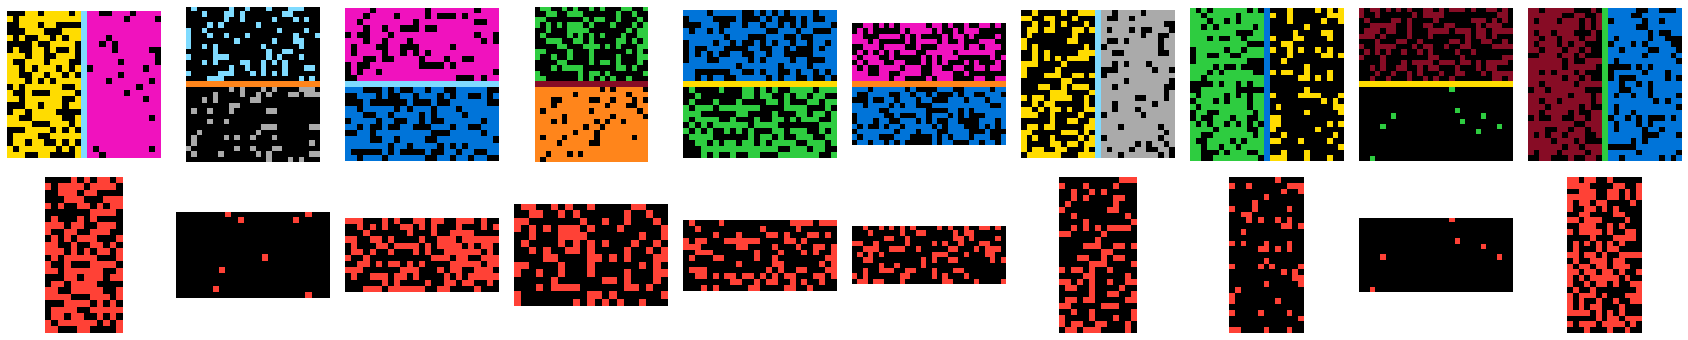

05269061
original:


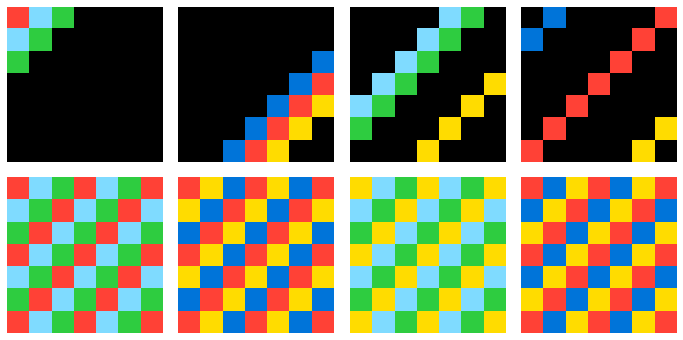

generated (easy):


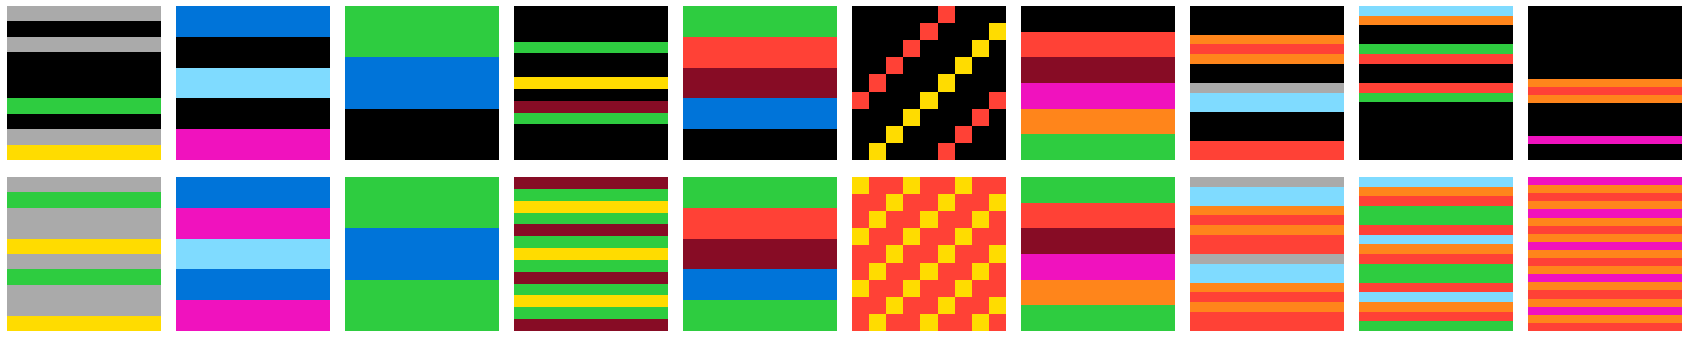

generated (hard):


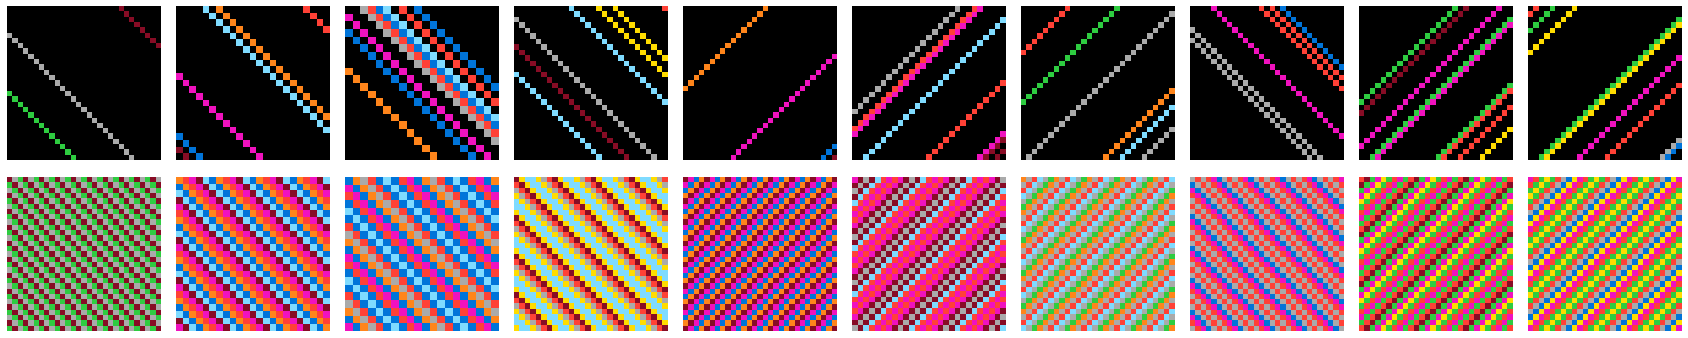

05f2a901
original:


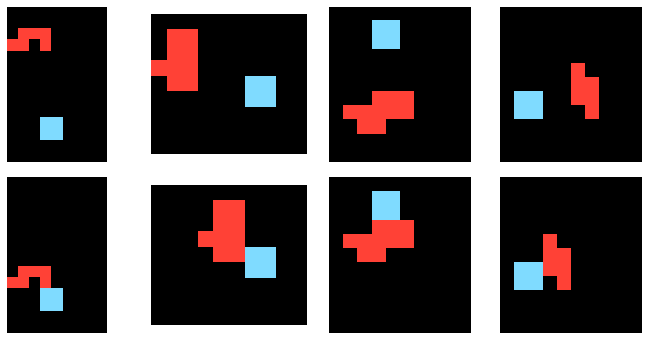

generated (easy):


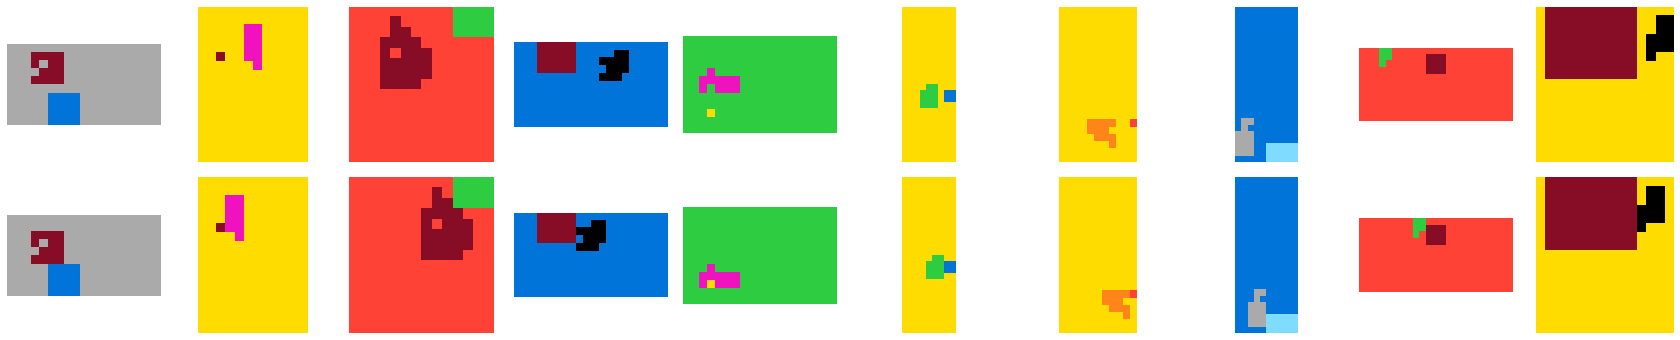

generated (hard):


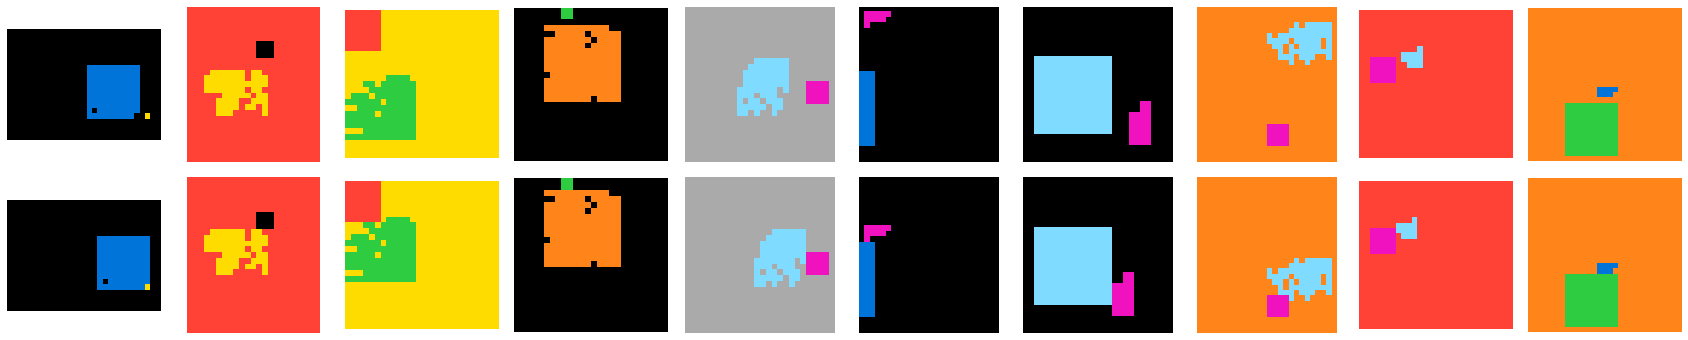

06df4c85
original:


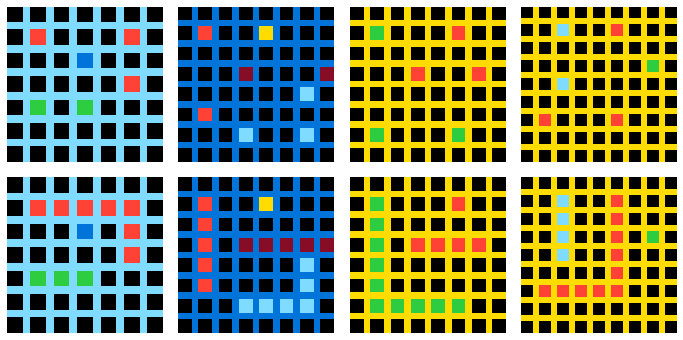

generated (easy):


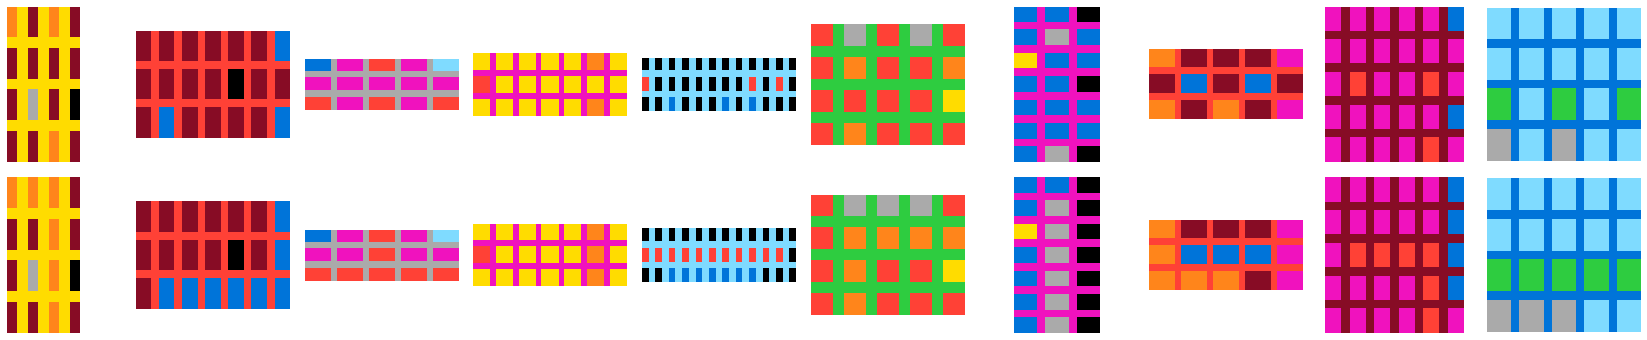

generated (hard):


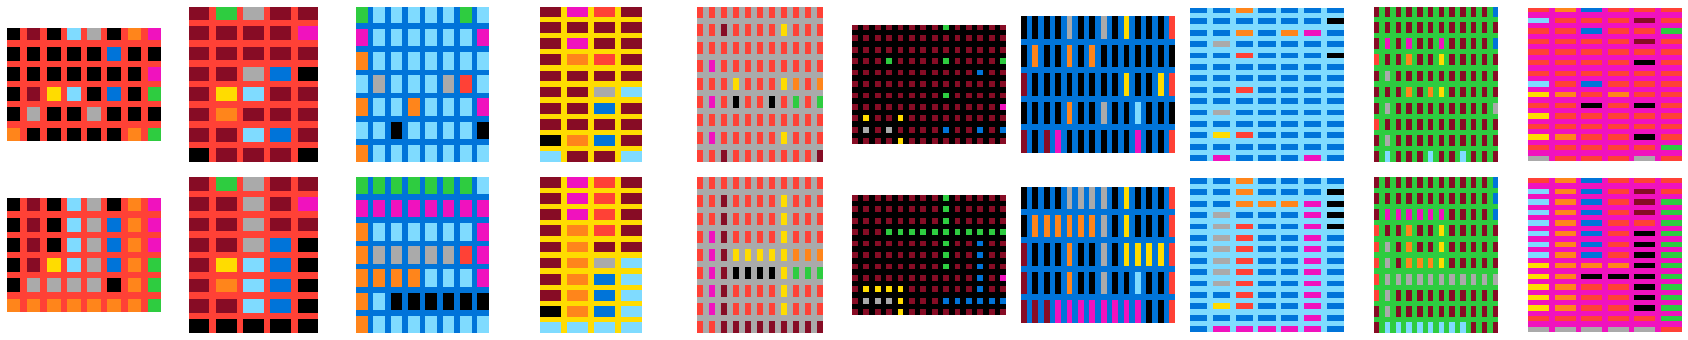

08ed6ac7
original:


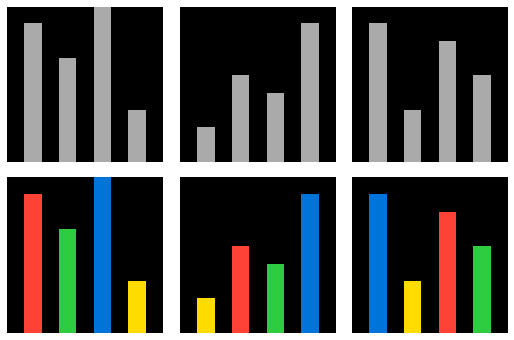

generated (easy):


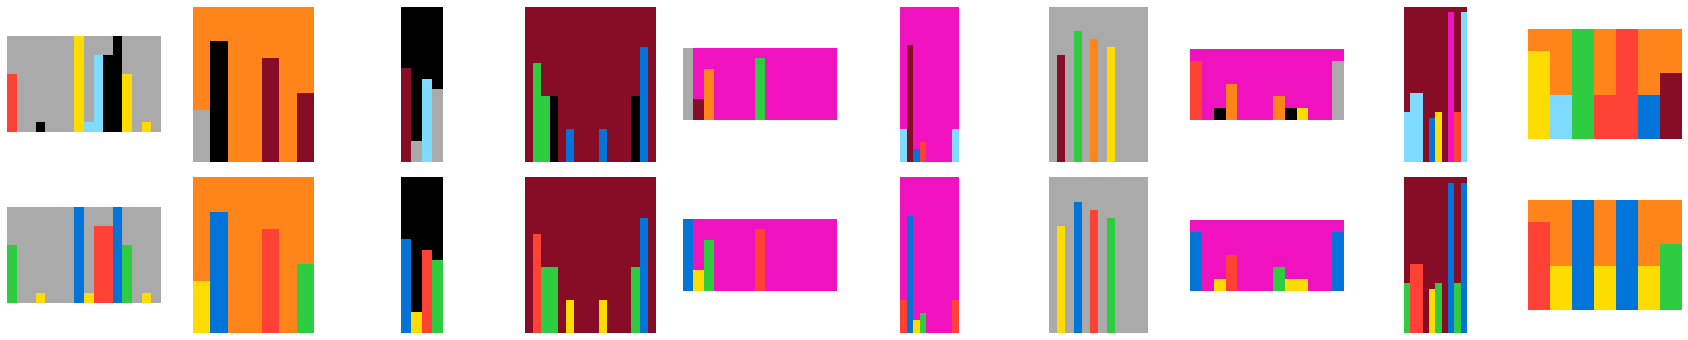

generated (hard):


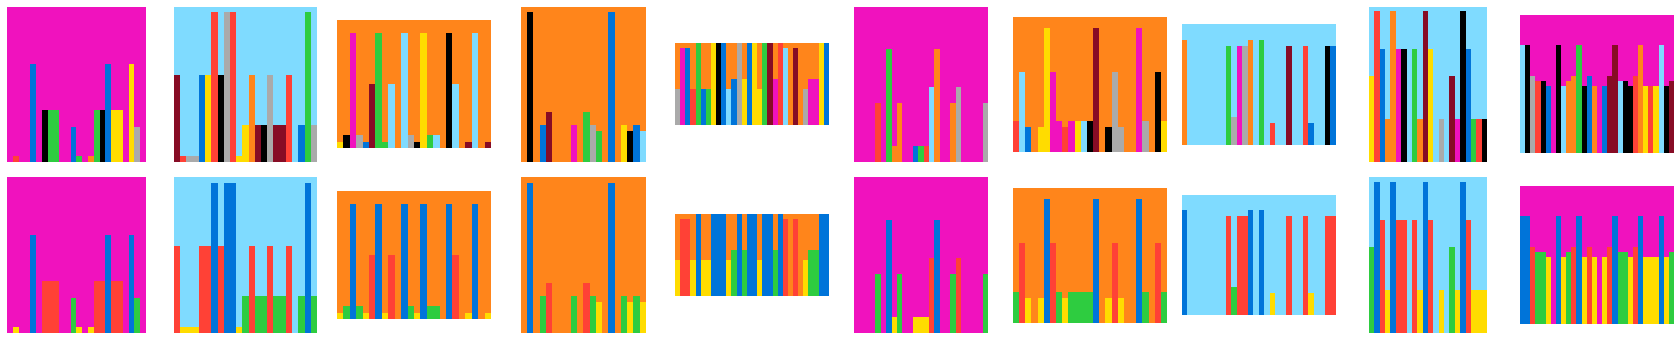

09629e4f
original:


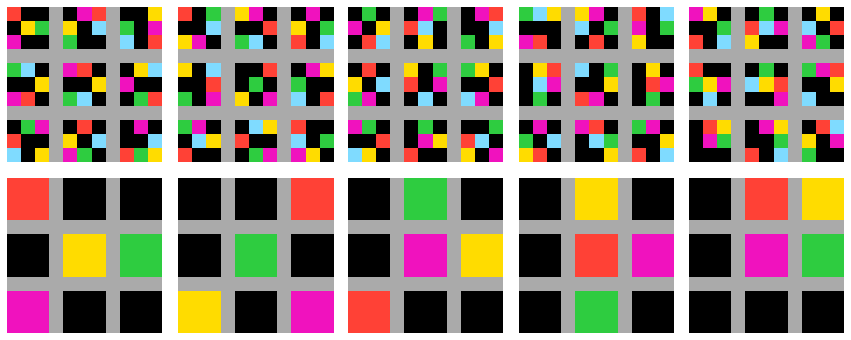

generated (easy):


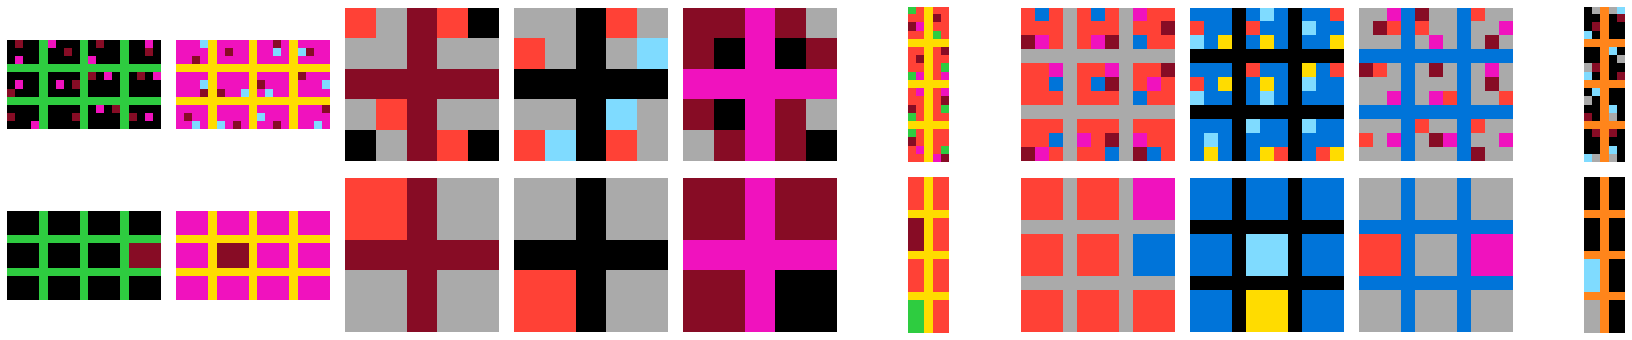

generated (hard):


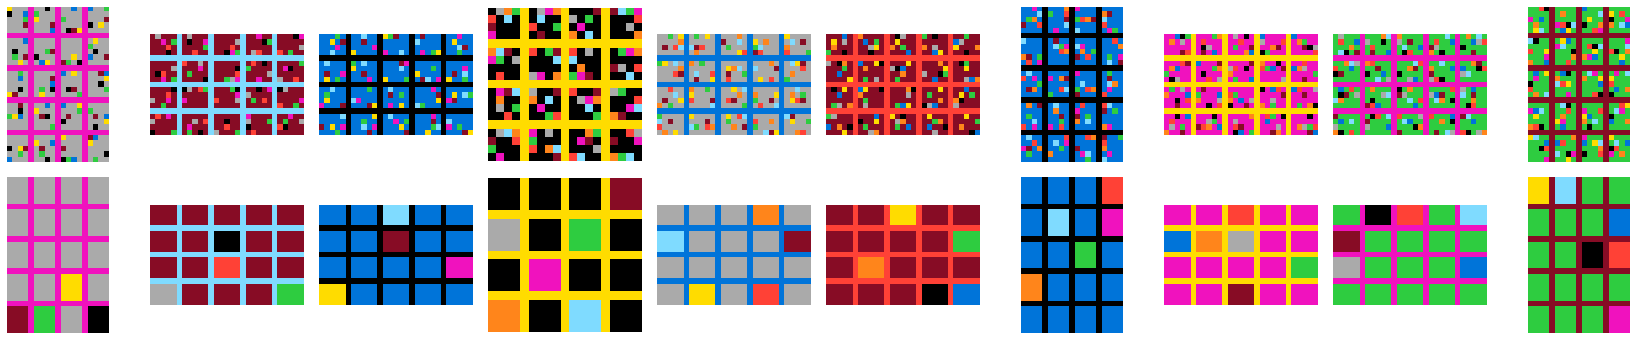

0962bcdd
original:


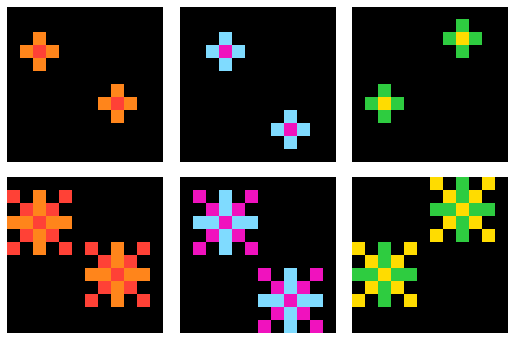

generated (easy):


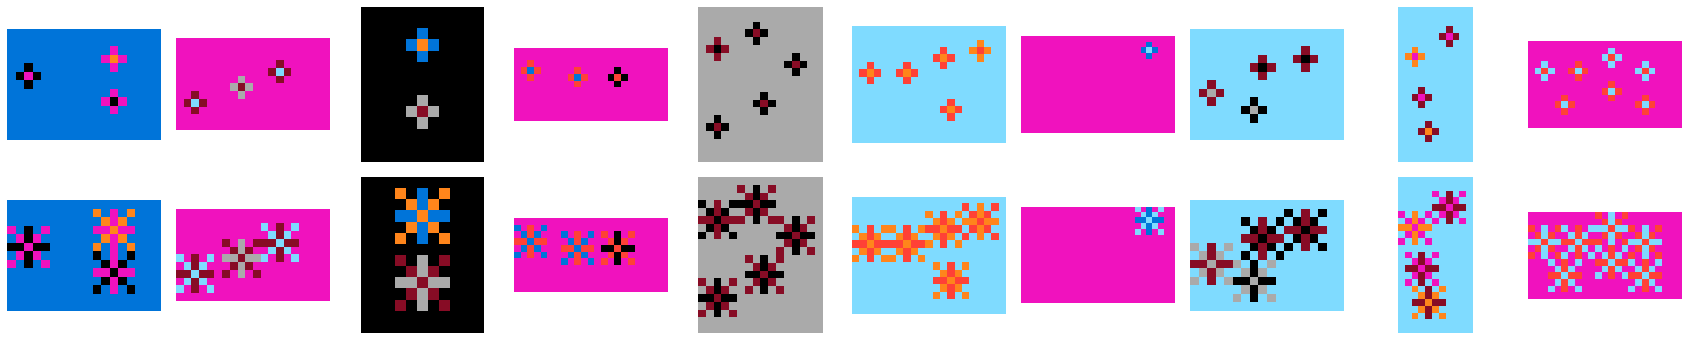

generated (hard):


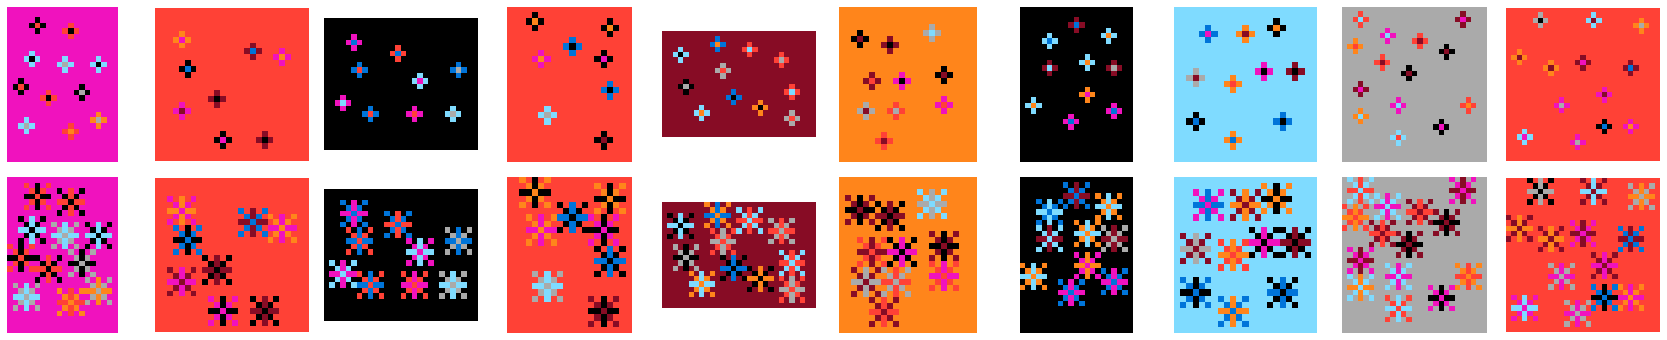

0a938d79
original:


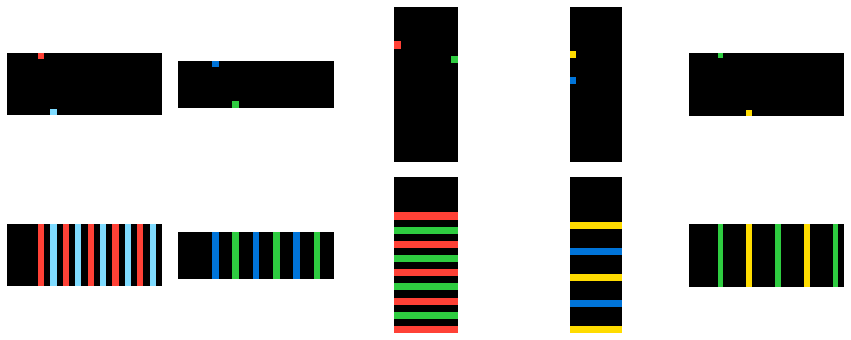

generated (easy):


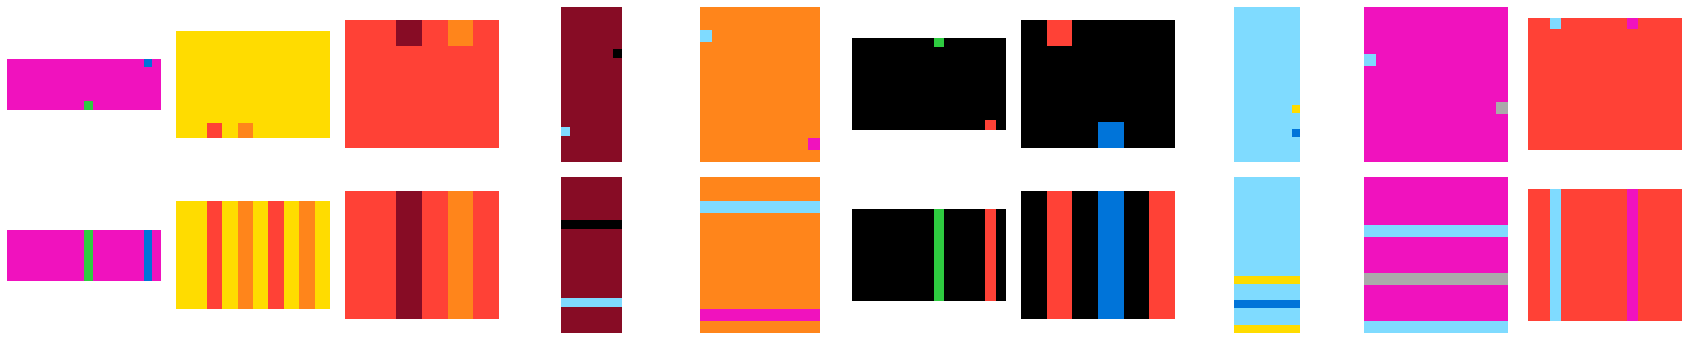

generated (hard):


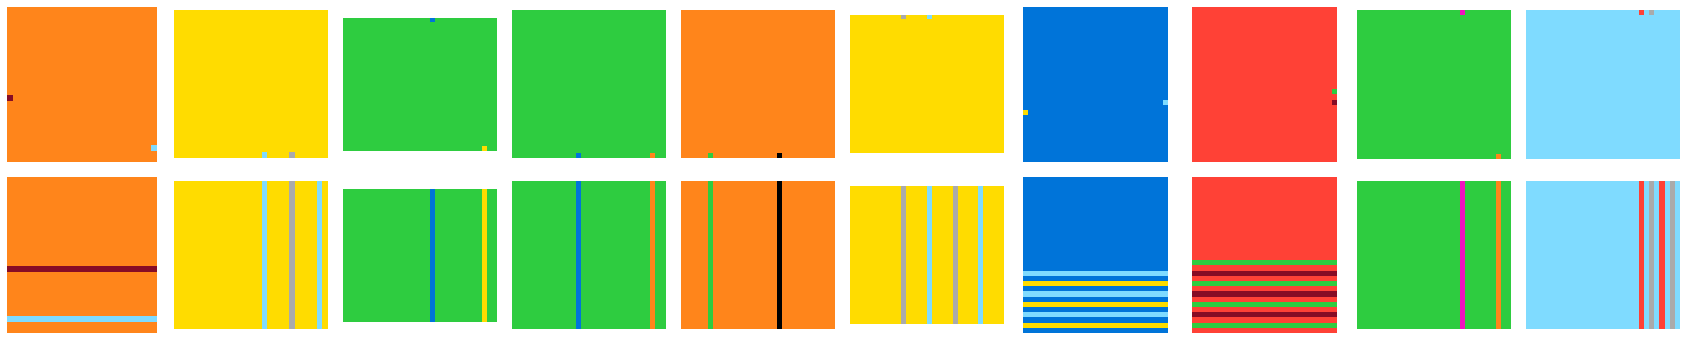

0b148d64
original:


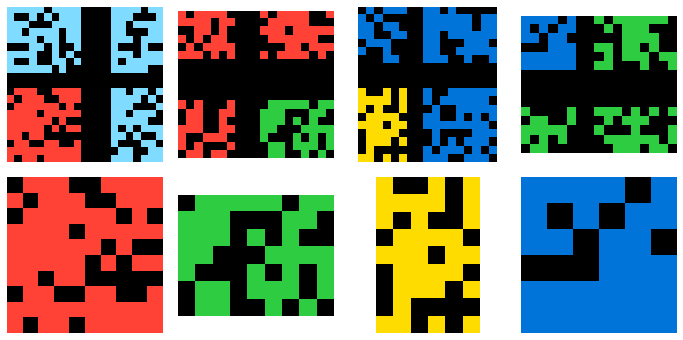

generated (easy):


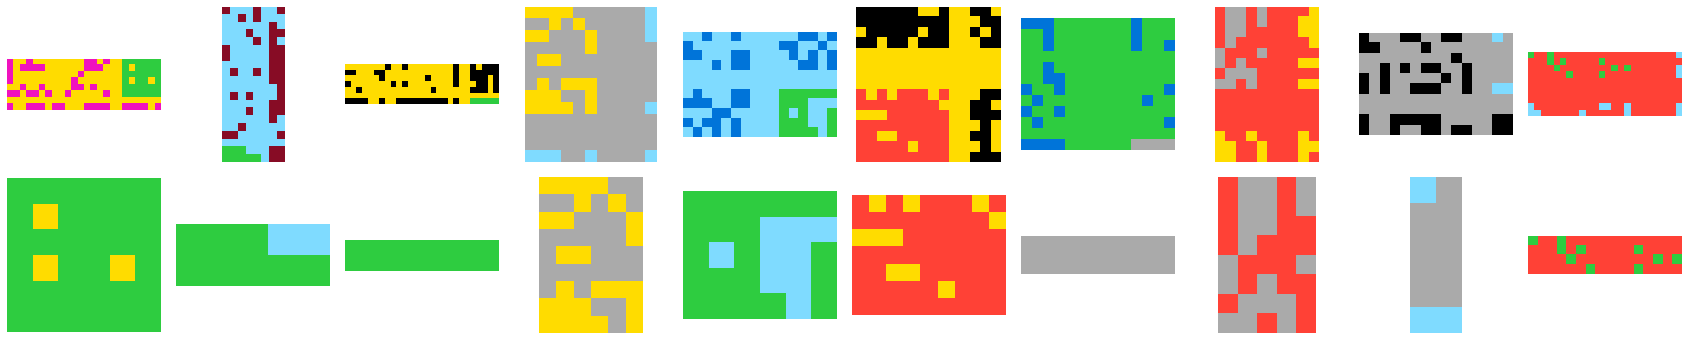

generated (hard):


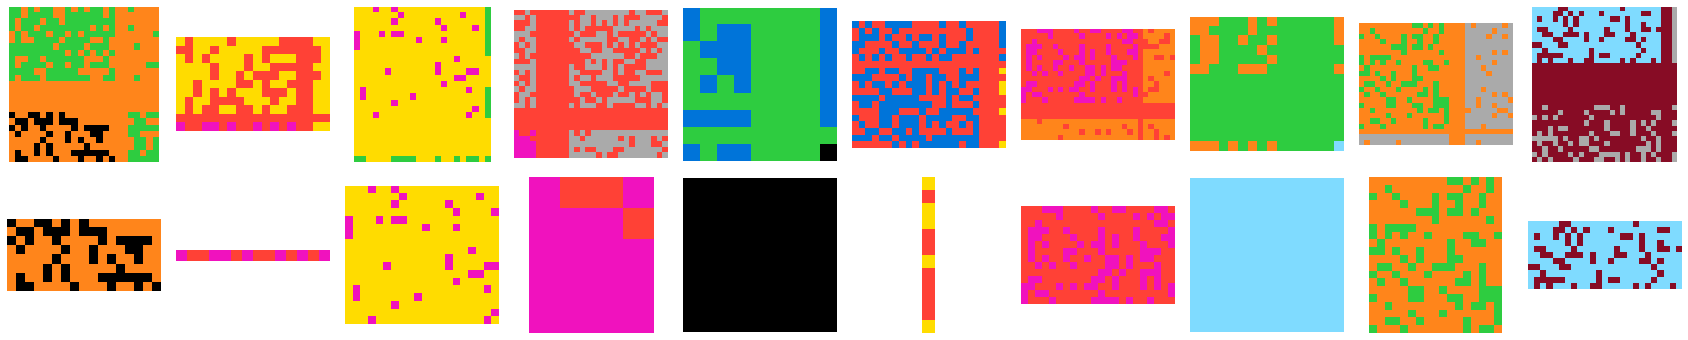

0ca9ddb6
original:


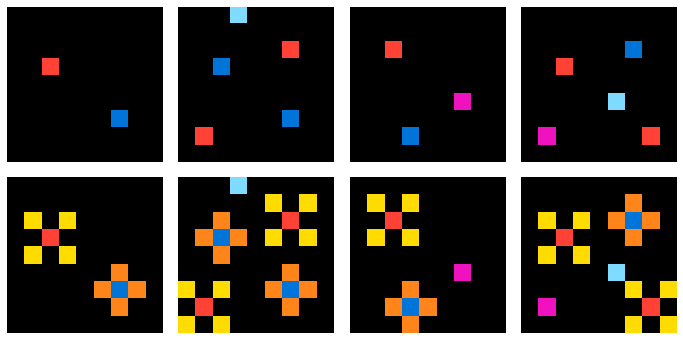

generated (easy):


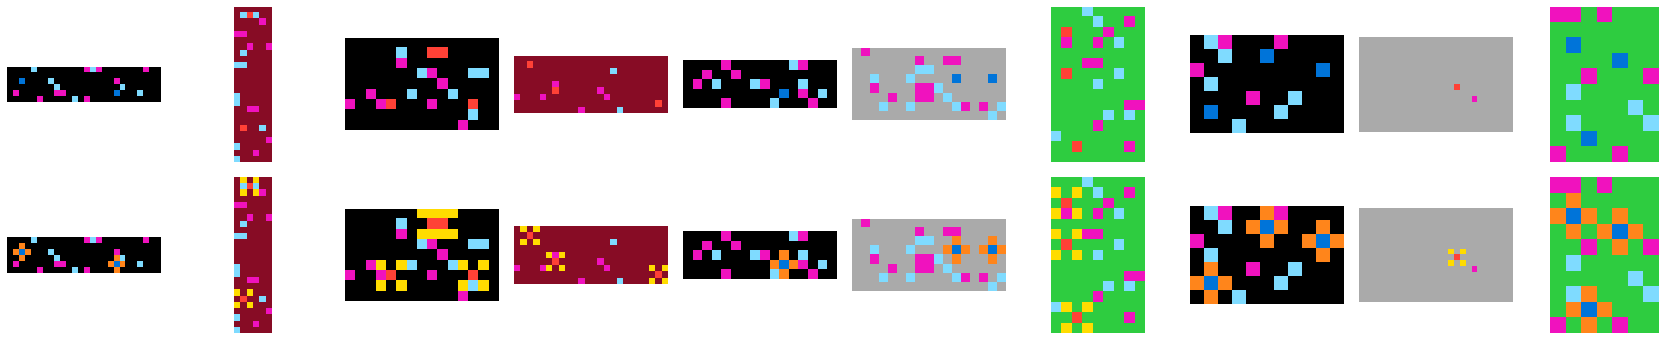

generated (hard):


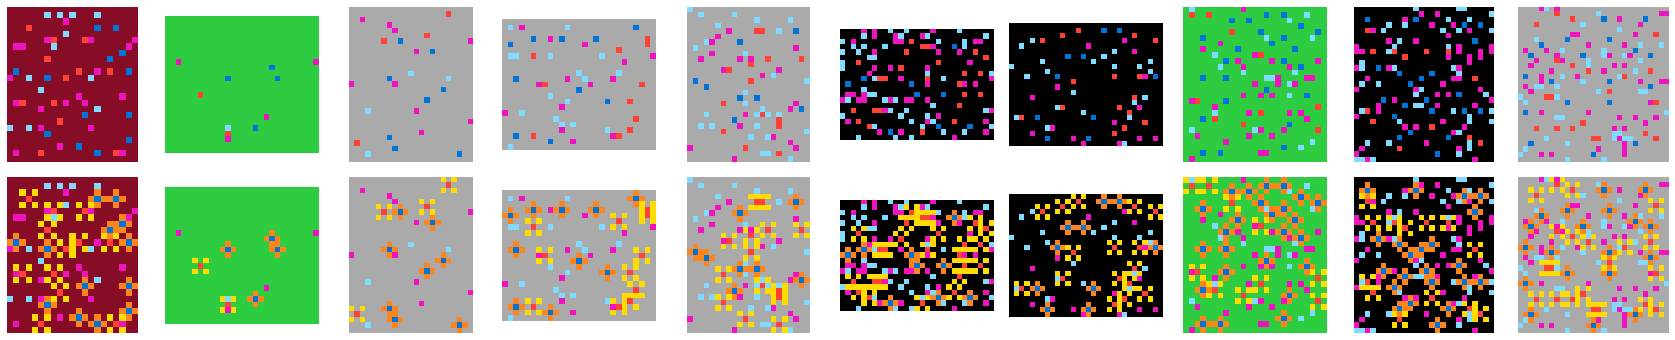

0d3d703e
original:


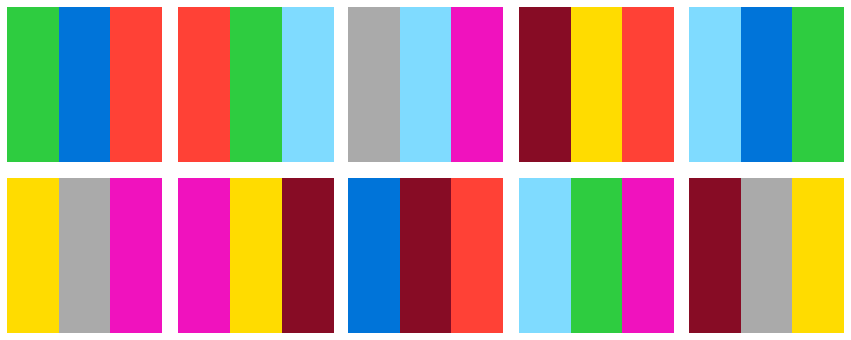

generated (easy):


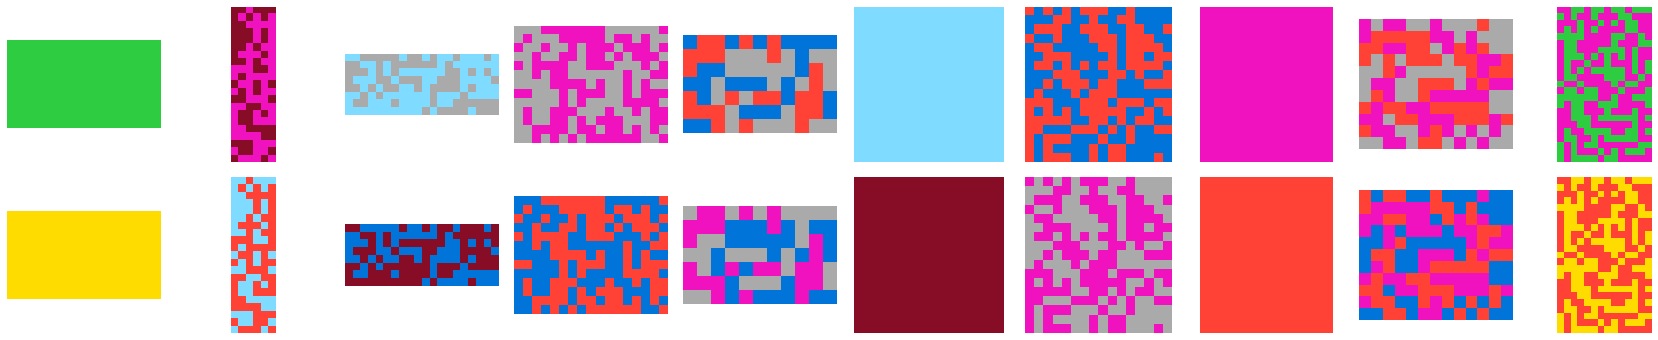

generated (hard):


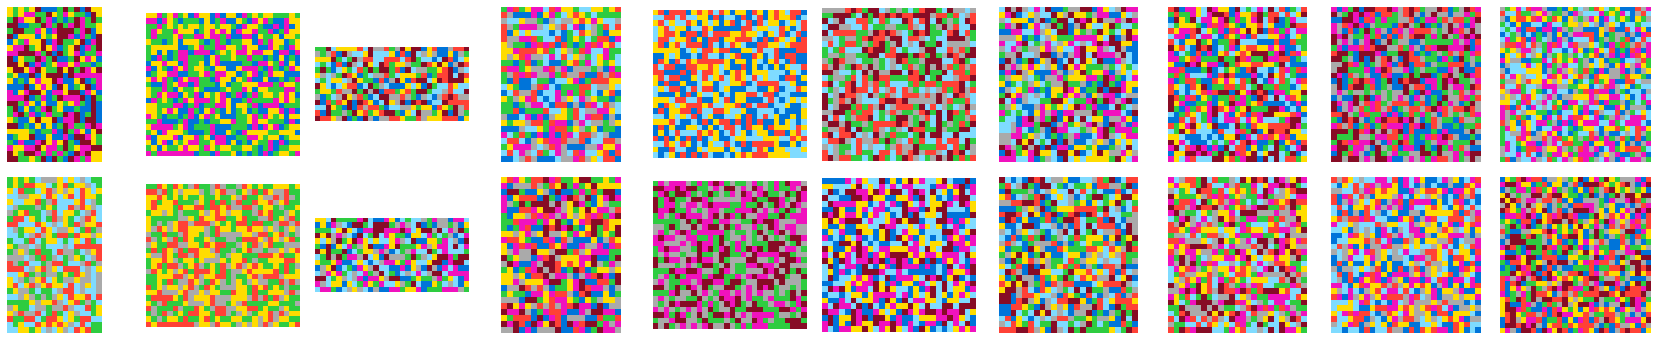

0dfd9992
original:


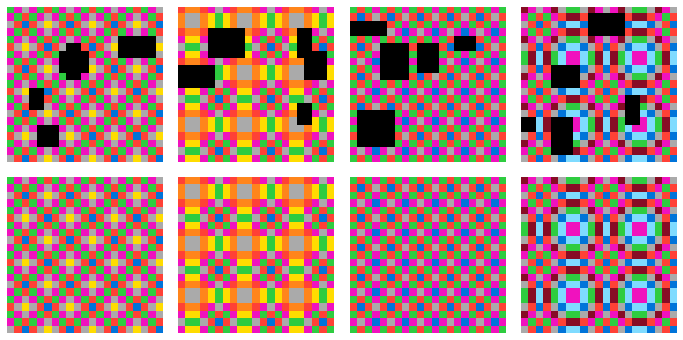

generated (easy):


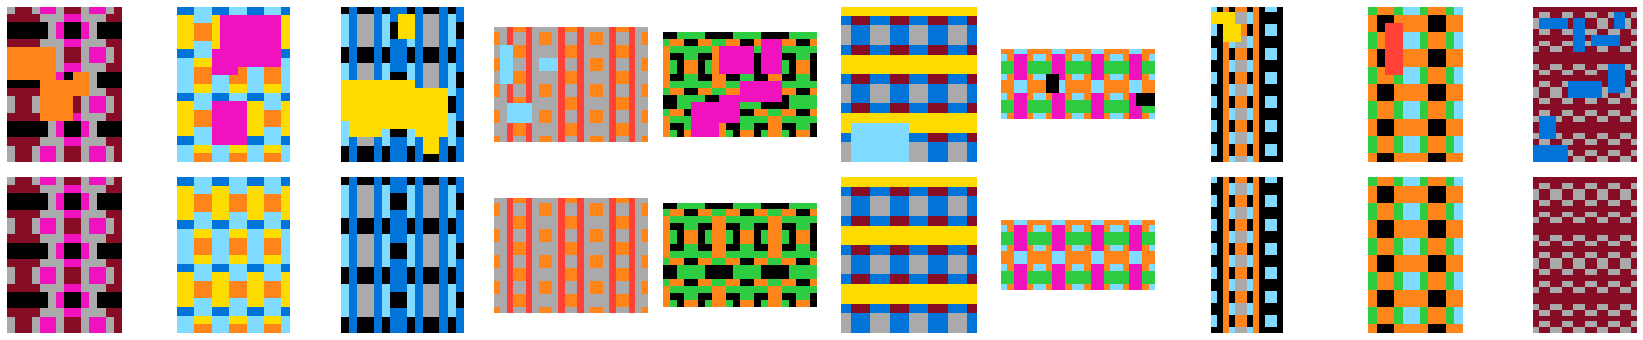

generated (hard):


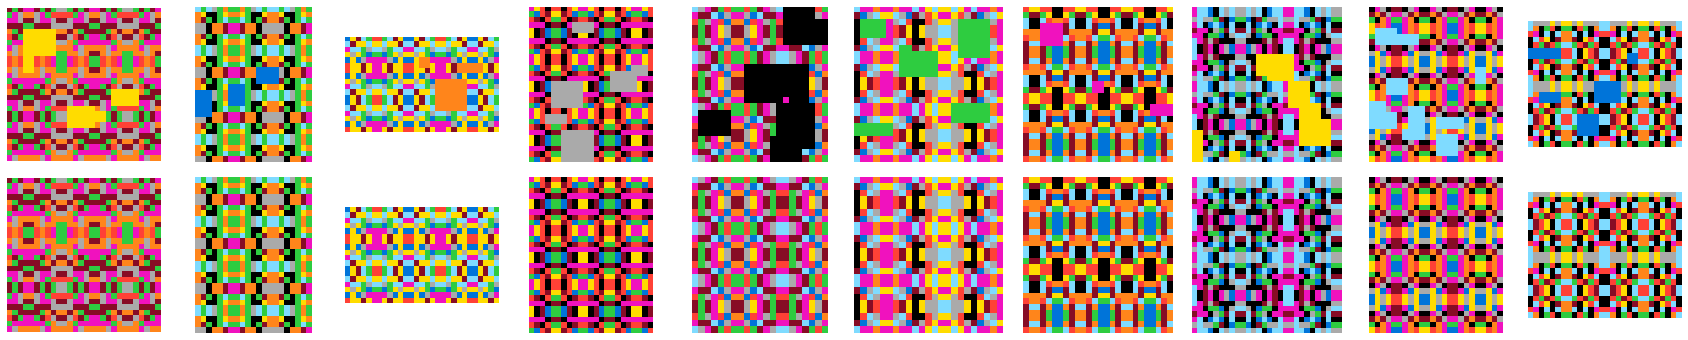

0e206a2e
original:


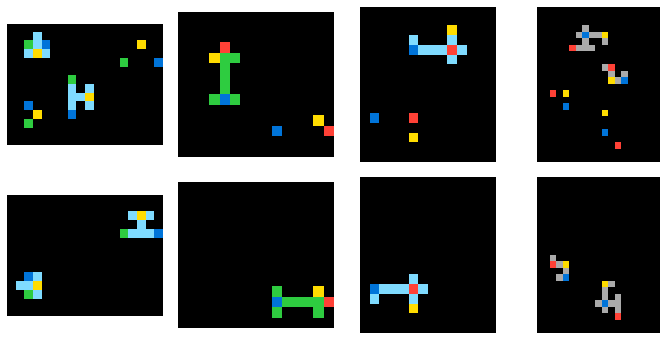

generated (easy):


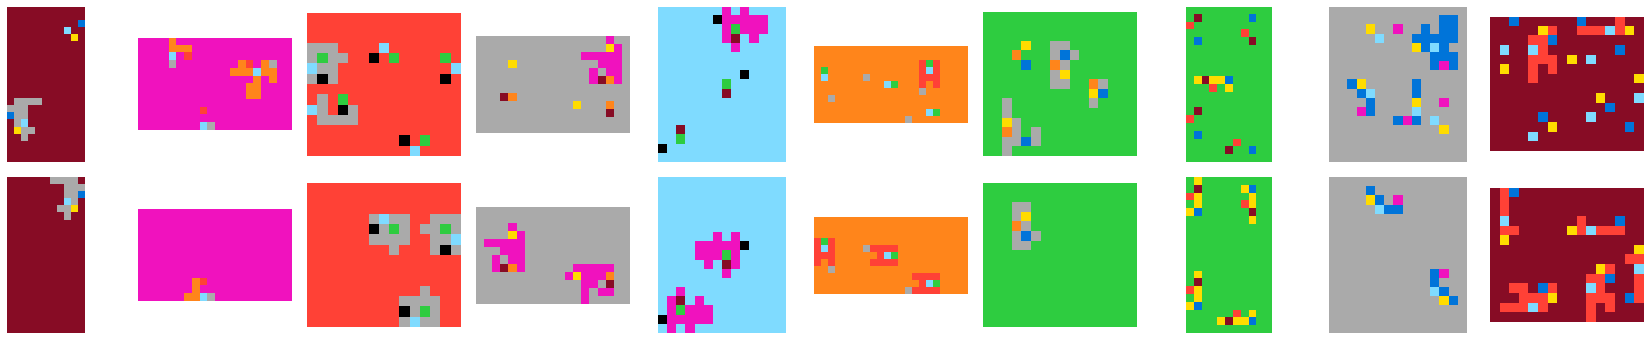

generated (hard):


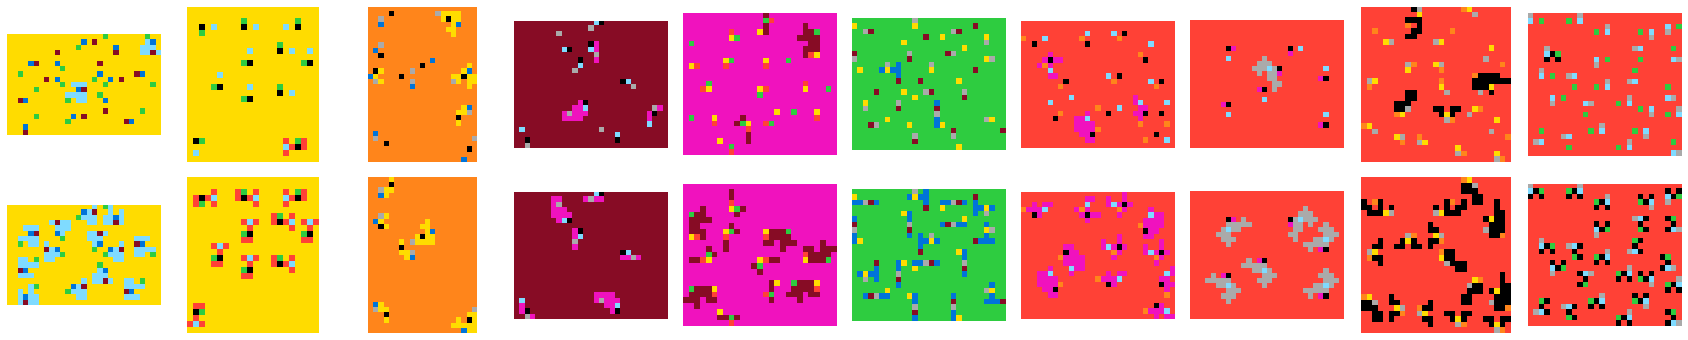

10fcaaa3
original:


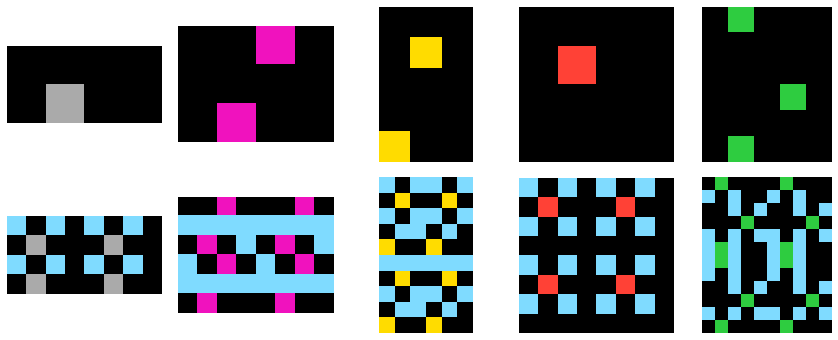

generated (easy):


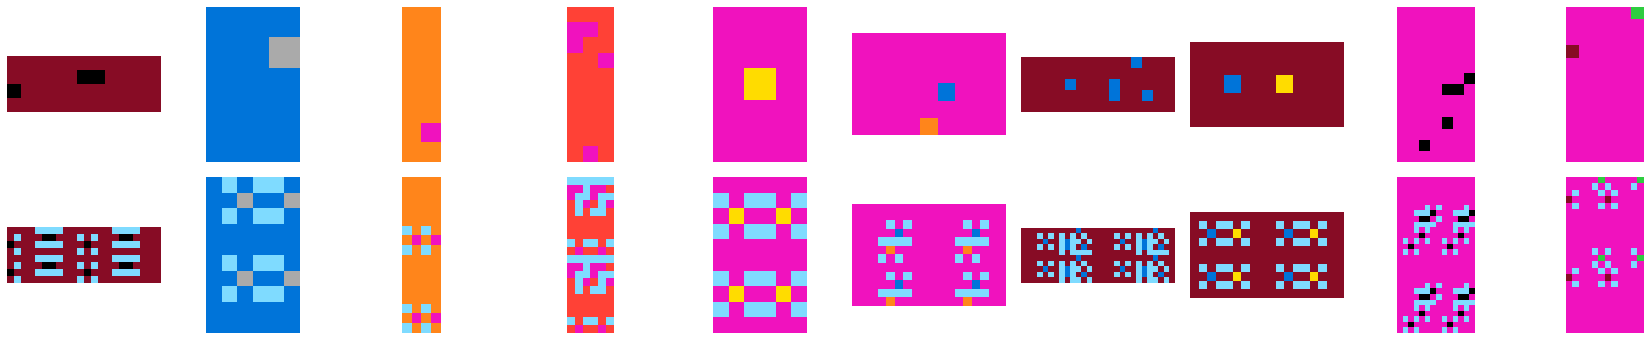

generated (hard):


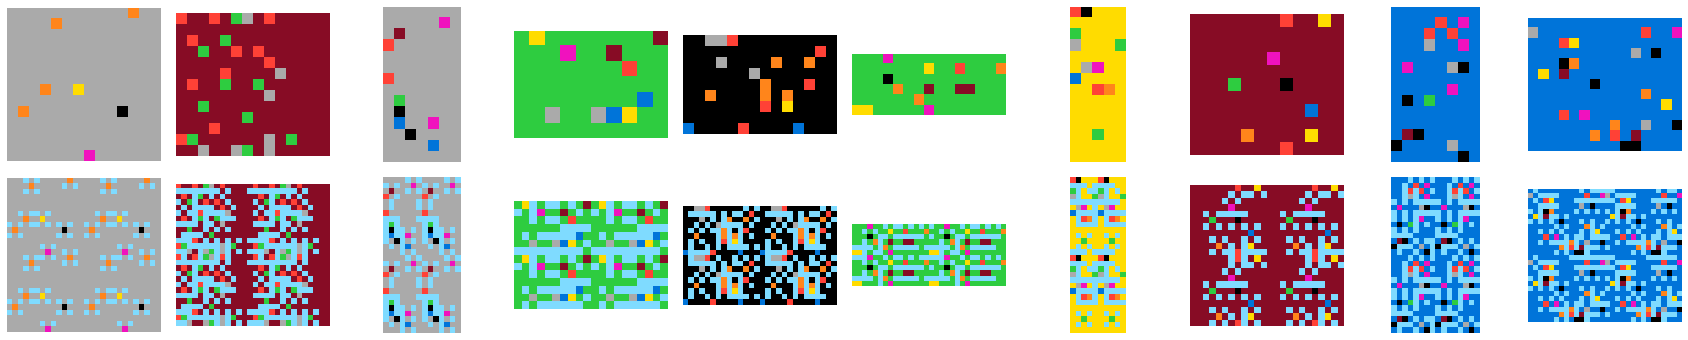

11852cab
original:


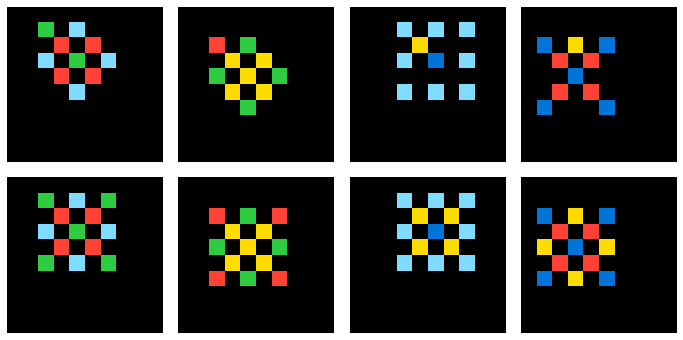

generated (easy):


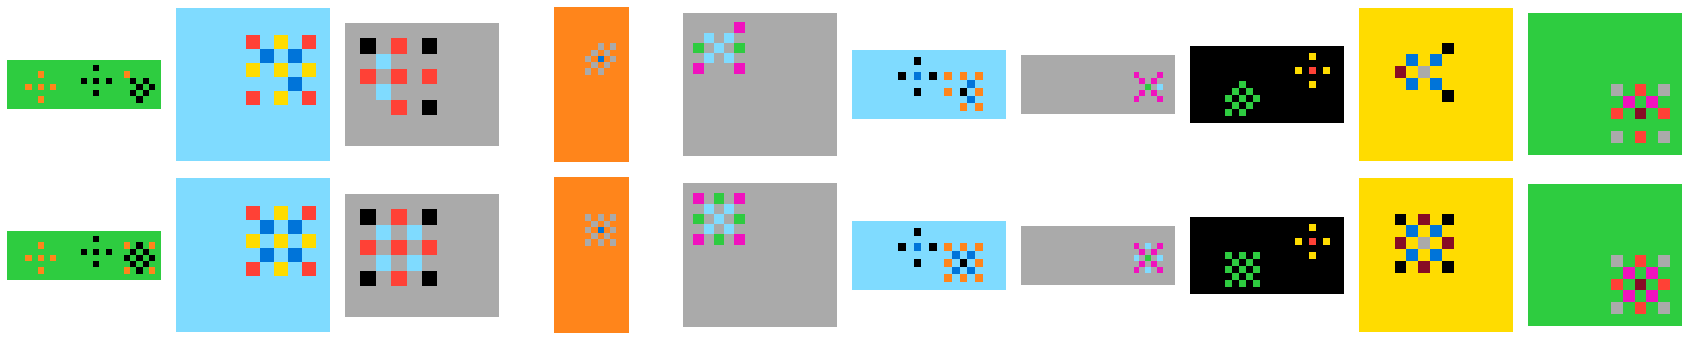

generated (hard):


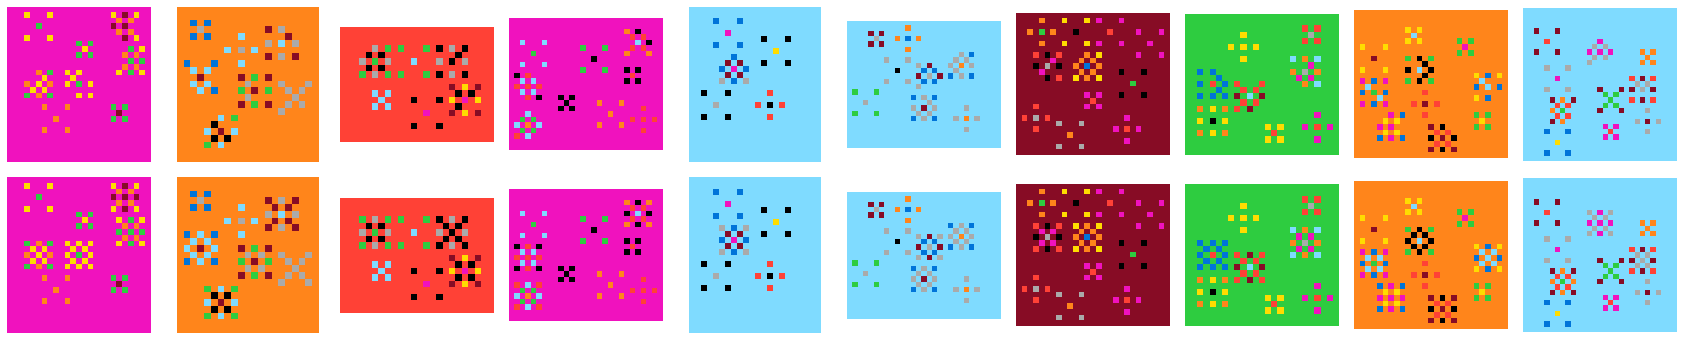

In [6]:
demo_dataset(folder='gen10000', n=10, s=0, e=5)

In [7]:
evaluate_verifiers_on_original_tasks()

verification programs work for all examples for 394/400 tasks
verification fails (on one example) for tasks {'97a05b5b', '29ec7d0e', 'a64e4611', '7e0986d6', '4290ef0e', '53b68214'}


In [ ]:
def demo_task(
    key: str,
    n: int = 8,
    folder: str = 'gen10000'
) -> None:
    """
    Visualize original and generated examples for a specific task ID
    
    Parameters:
    key (str): The task ID (e.g., '74dd1130')
    n (int): Number of examples to display for each difficulty category
    folder (str): Folder containing the generated dataset
    """
    import os
    import json
    
    # Load original task
    try:
        with open(f'arc_original/training/{key}.json', 'r') as fp:
            original_task = json.load(fp)
        original_examples = [format_example(example) for example in original_task['train'] + original_task['test']]
    except:
        print(f"Couldn't find original task: {key}")
        original_examples = []
    
    # Load generated task examples
    try:
        with open(f'{folder}/tasks/{key}.json', 'r') as fp:
            generated_examples = json.load(fp)
        
        # Load difficulties
        try:
            with open(f'{folder}/metadata.json', 'r') as fp:
                metadata = json.load(fp)
            difficulties = metadata[key]['pso_difficulties'][:min(len(generated_examples), n*10)]
        except:
            print(f"Couldn't load difficulties, sorting randomly")
            difficulties = list(range(len(generated_examples)))
        
        # Format and sort examples by difficulty
        formatted_examples = [format_example(example) for example in generated_examples[:min(len(generated_examples), n*10)]]
        sorted_examples = [ex for ex, diff in sorted(zip(formatted_examples, difficulties), key=lambda item: item[1])]
        
        # Select easy and hard examples
        easy_examples = sorted_examples[:n] if len(sorted_examples) >= n else sorted_examples
        hard_examples = sorted_examples[-n:] if len(sorted_examples) >= 2*n else sorted_examples
    except:
        print(f"Couldn't find generated task: {key}")
        easy_examples = []
        hard_examples = []
    
    # Display results
    print(key)
    
    if original_examples:
        print('original:')
        plot_task(original_examples)
    
    if easy_examples:
        print('generated (easy):')
        plot_task(easy_examples)
    
    if hard_examples:
        print('generated (hard):')
        plot_task(hard_examples)

ed36ccf7
original:


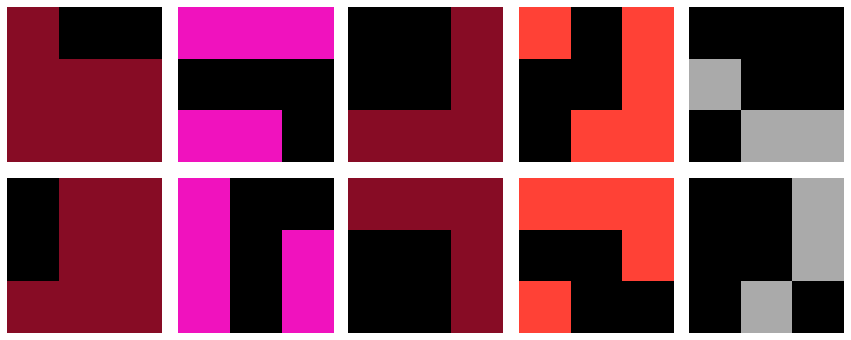

generated (easy):


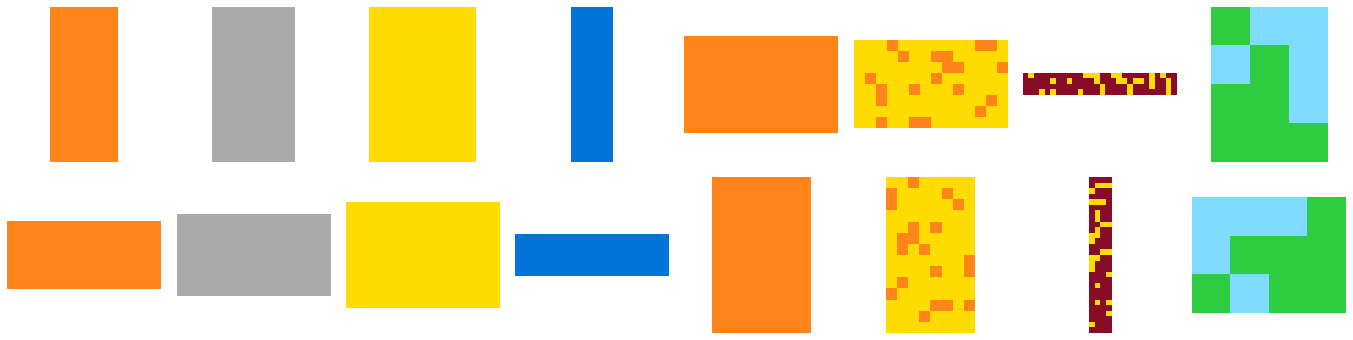

generated (hard):


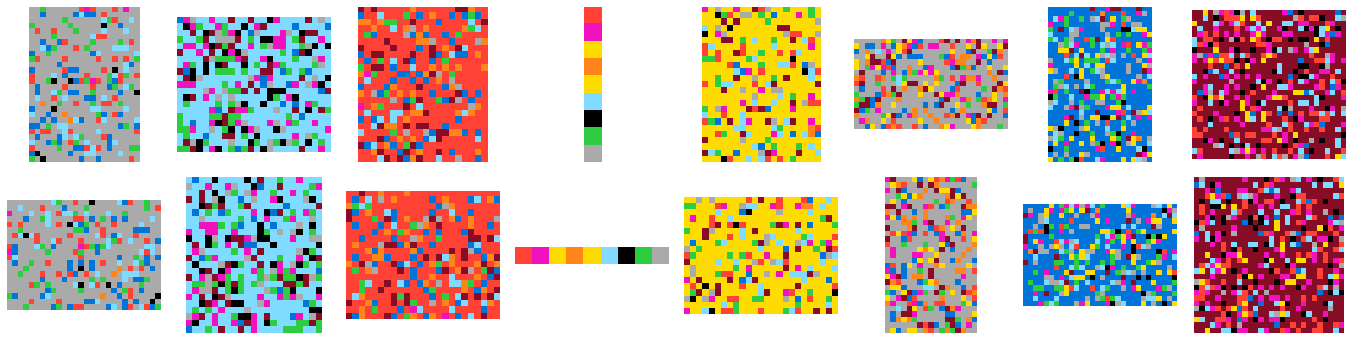

In [8]:
demo_task('ed36ccf7')

74dd1130
original:


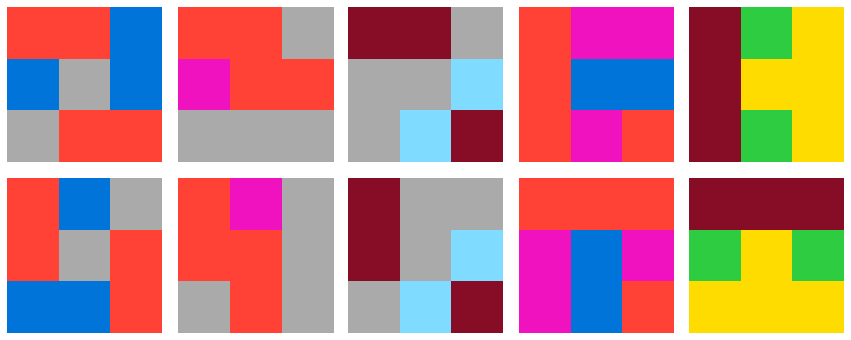

generated (easy):


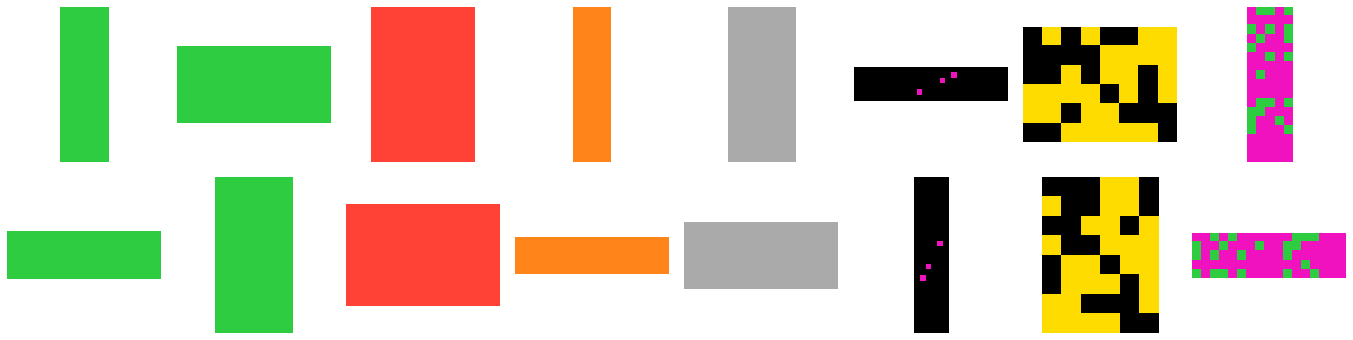

generated (hard):


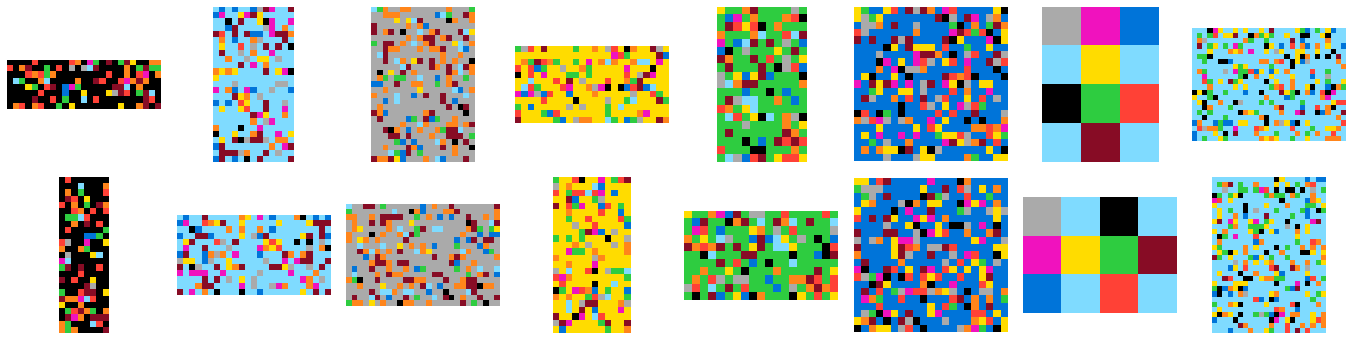

In [9]:
demo_task('74dd1130')

794b24be
original:


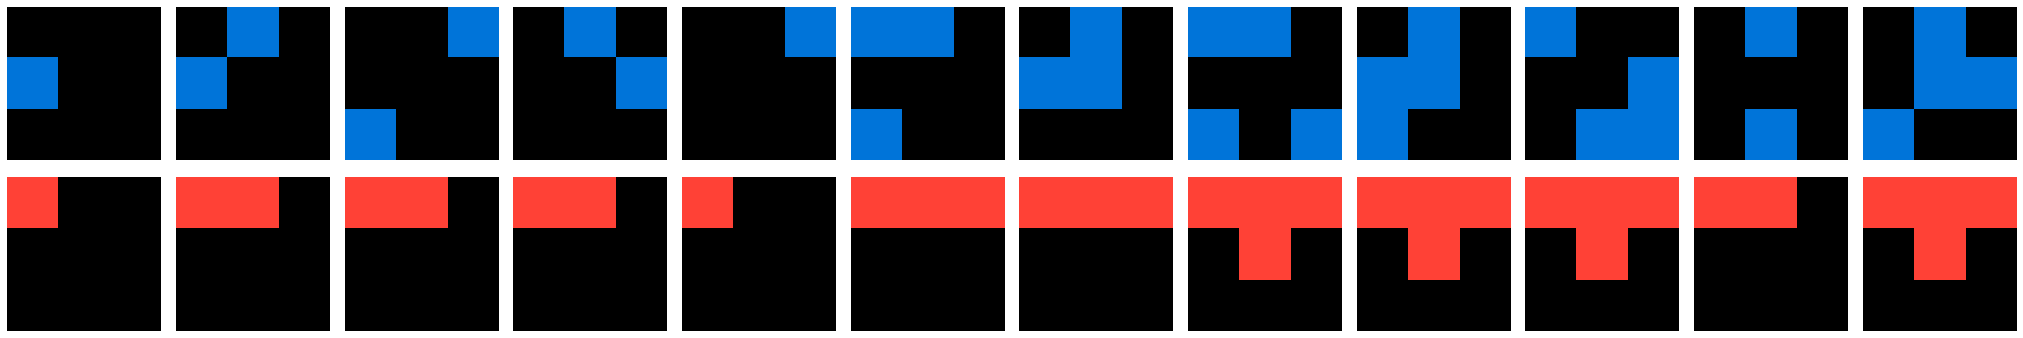

generated (easy):


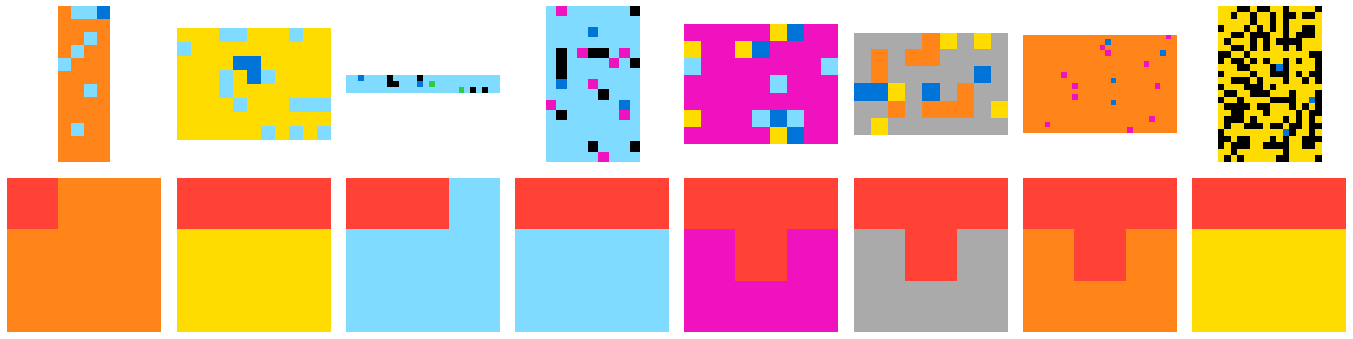

generated (hard):


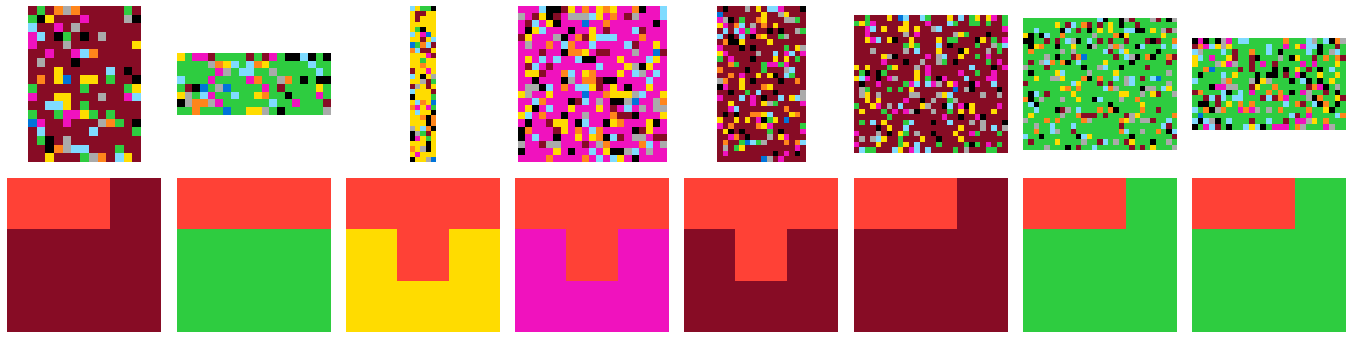

In [10]:
demo_task('794b24be')